### Exercise 6

### Testing stratified_train_test_split

In [216]:
from si.io.csv_file import read_csv
from si.model_selection.split import stratified_train_test_split
iris = read_csv('/home/pauloseixal/Github/si/datasets/iris/iris.csv',sep=',',features=True, label=True)

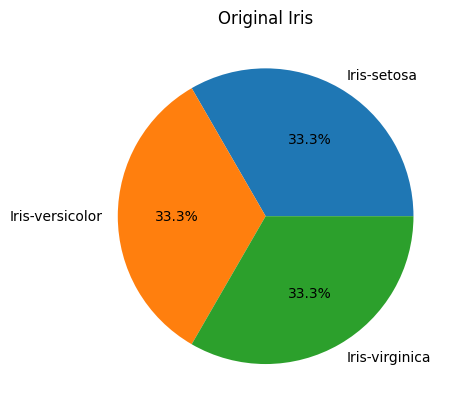

In [217]:
import numpy as np
import matplotlib.pyplot as plt

labels, counts = np.unique(iris.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Original Iris')
plt.show()


In [218]:
dataset_train, dataset_test = stratified_train_test_split(iris, test_size=0.2)

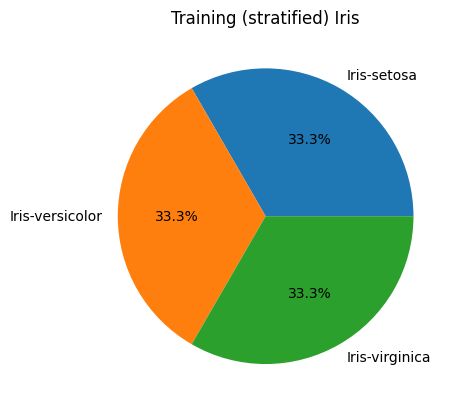

In [219]:
labels, counts = np.unique(dataset_train.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Training (stratified) Iris')
plt.show()

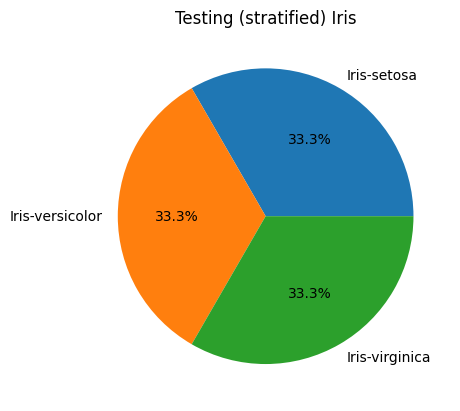

In [220]:
labels, counts = np.unique(dataset_test.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Testing (stratified) Iris')
plt.show()

### Comparison with non-stratified train_test_split

In [221]:
from si.model_selection.split import train_test_split
dataset_train, dataset_test = train_test_split(iris, test_size=0.2)

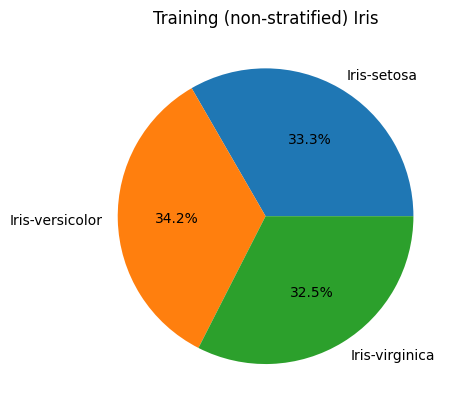

In [222]:
labels, counts = np.unique(dataset_train.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Training (non-stratified) Iris')
plt.show()

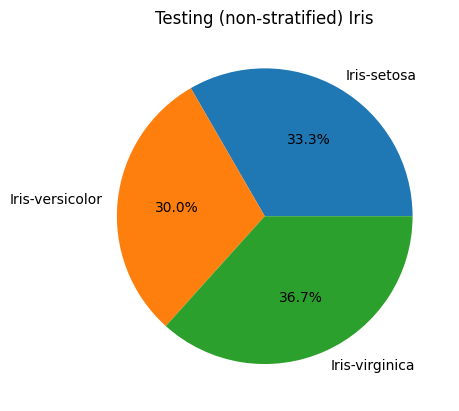

In [223]:
labels, counts = np.unique(dataset_test.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Testing (non-stratified) Iris')
plt.show()

### Exercise 7

### Testing RMSE

In [224]:
from si.metrics.rmse import rmse

y_true = np.array([2, 4, 5, 4, 5])
y_pred = np.array([1.5, 3.5, 5, 4.5, 5.5])

# Calculate RMSE
result = rmse(y_true, y_pred)

# Print the result
print(f"Root Mean Squared Error: {result}")

Root Mean Squared Error: 0.4472135954999579


In [225]:
# compare with sklearn
from sklearn.metrics import mean_squared_error
result = mean_squared_error(y_true, y_pred, squared=False)
print(f"Root Mean Squared Error: {result}")



Root Mean Squared Error: 0.4472135954999579


### Testing KNNRegressor

In [226]:
cpu = read_csv('/home/pauloseixal/Github/si/datasets/cpu/cpu.csv',sep=',',features=True, label=True)

In [227]:
from si.models.knn_regressor import KNNRegressor

dataset_train, dataset_test = train_test_split(cpu, test_size=0.2)

# initialize the KNN classifier
knn = KNNRegressor(k=3)

# fit the model to the train dataset
knn.fit(dataset_train)

# evaluate the model on the test dataset
score = knn.score(dataset_test)
print(f'The RMSE of the model is: {score}')

The RMSE of the model is: 81.36259969252635


In [228]:
# initialize the KNN classifier (weighted)
knn = KNNRegressor(k=3, weights='distance')

# fit the model to the train dataset
knn.fit(dataset_train)

# evaluate the model on the test dataset
score = knn.score(dataset_test)
print(f'The RMSE of the model (weighted) is: {score}')

The RMSE of the model (weighted) is: 81.61448223686475


### Comparing with sklearn's KNeighborsRegressor

In [229]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error

dataset_train, dataset_test = train_test_split(cpu, test_size=0.2)

# initialize the KNN classifier
knn = KNeighborsRegressor(n_neighbors=3)

# fit the model to the train dataset
knn.fit(dataset_train.X, dataset_train.y)

# evaluate the model on the test dataset
score = mean_squared_error(dataset_test.y, knn.predict(dataset_test.X), squared=False)
print(f'The RMSE of the model is: {score}')
    

The RMSE of the model is: 81.36153382890387


In [230]:
# initialize the KNN classifier (weighted)
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')

# fit the model to the train dataset
knn.fit(dataset_train.X, dataset_train.y)

# evaluate the model on the test dataset
score = mean_squared_error(dataset_test.y, knn.predict(dataset_test.X), squared=False)
print(f'The RMSE of the model (weighted) is: {score}')

The RMSE of the model (weighted) is: 81.614482319408


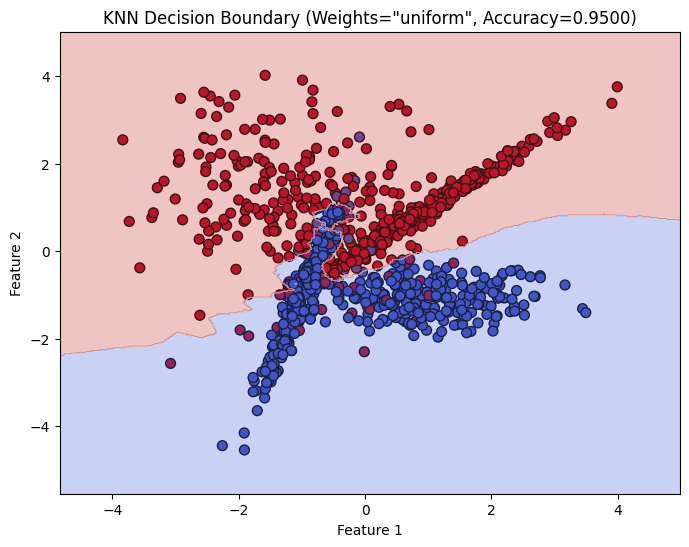

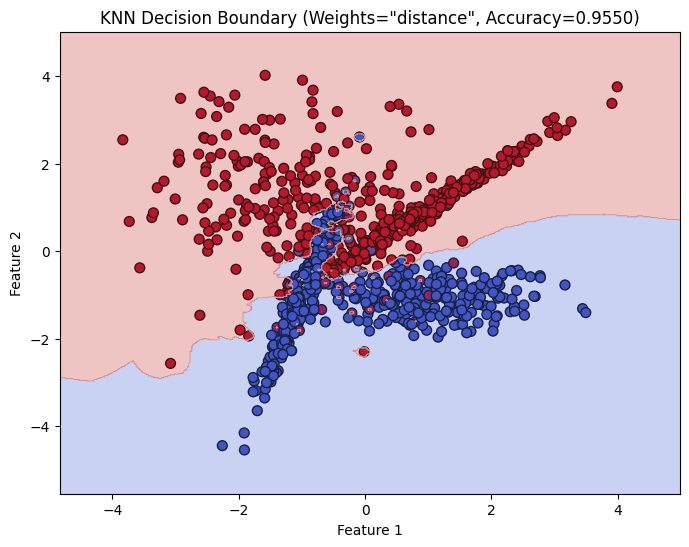

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from si.data.dataset import Dataset
from si.models.knn_classifier import KNNClassifier

# Generate a random dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

dataset = Dataset(X,y)

# Split the data into training and testing sets
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=42)

# Define a function to train and evaluate a KNN classifier with different weight settings
def evaluate_knn(weights):
    knn = KNNClassifier(k=11, weights=weights)
    knn.fit(dataset_train)
    y_pred = knn.predict(dataset_test)
    accuracy = accuracy_score(dataset_test.y, y_pred)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=50)
    
    # Plot decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = Dataset(np.vstack([xx.ravel(), yy.ravel()]).T)
    Z = knn.predict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.title(f'KNN Decision Boundary (Weights="{weights}", Accuracy={accuracy:.4f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Test with different weight settings
weights_list = ['uniform', 'distance']

for weights in weights_list:
    evaluate_knn(weights)
